In [2]:
import pandas as pd
sa=pd.read_csv("bank_transactions_data_2.csv")
sa

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [3]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
sa.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [5]:
sa.dtypes

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

<Axes: >

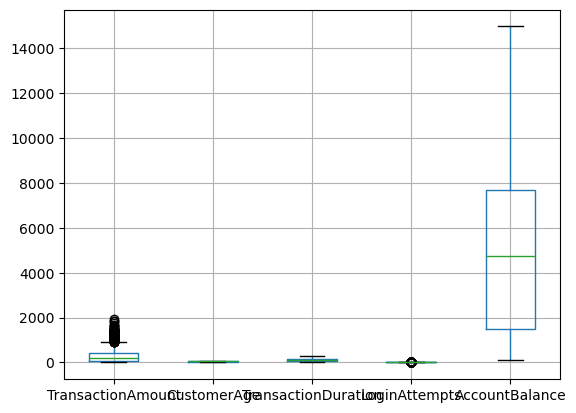

In [6]:
import matplotlib.pyplot as plt
sa.boxplot()


In [7]:
col = 'TransactionAmount'

Q1 = sa[col].quantile(0.25)
Q3 = sa[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sa[(sa[col] < lower_bound) | (sa[col] > upper_bound)]
print(f'Number of outliers in {col}:', len(outliers))

Number of outliers in TransactionAmount: 113


In [8]:
sa.boxplot()

<Axes: >

In [9]:
sa.hist()

array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>],
       [<Axes: title={'center': 'AccountBalance'}>, <Axes: >]],
      dtype=object)

In [10]:
plt.scatter(sa["TransactionDate"],sa["TransactionAmount"])

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
x=sa.drop(["TransactionAmount"],axis=1)
y=sa[["TransactionAmount"]]

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [49]:
x_train.size

26370

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [15]:
print(sa.head())
print(sa.info())


  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
numeric_data = sa.select_dtypes(include=['float64', 'int64'])

In [18]:
numeric_data = numeric_data.fillna(numeric_data.mean())

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [20]:
from sklearn.cluster import DBSCAN

In [24]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_data)
sa['DBSCAN_Label'] = labels
print(sa['DBSCAN_Label'].value_counts())

DBSCAN_Label
 0     1907
-1      508
 1       27
 7       12
 10      10
 2        9
 9        8
 5        8
 6        7
 3        7
 4        5
 8        4
Name: count, dtype: int64


In [28]:
threshold = 10000
sa['label'] = sa['TransactionAmount'].apply(lambda x:'anomalous'if x > threshold else'normal')
print(sa[['TransactionAmount','label']].head())

   TransactionAmount   label
0              14.09  normal
1             376.24  normal
2             126.29  normal
3             184.50  normal
4              13.45  normal


In [39]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

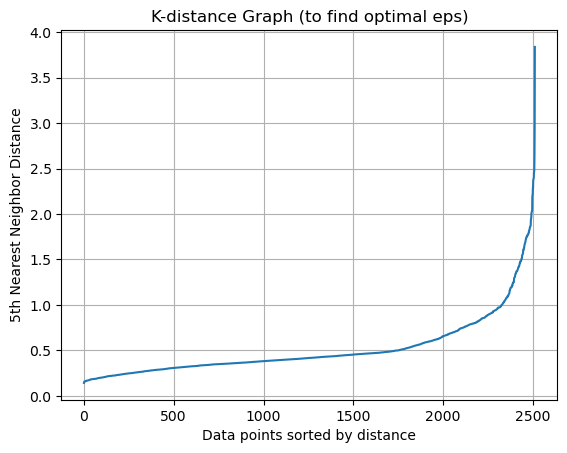

Number of outliers detected: 515


In [40]:
sa_numeric = sa.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
sa_scaled = scaler.fit_transform(sa_numeric)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(sa_scaled)
distances, indices = neighbors_fit.kneighbors(sa_scaled)
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title('K-distance Graph (to find optimal eps)')
plt.xlabel('Data points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.grid(True)
plt.show()
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(sa_scaled)
n_outliers = np.sum(labels == -1)
print(f"Number of outliers detected: {n_outliers}")

Confusion Matrix:
 [[2386  126]
 [   0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      2512
           1       0.00      0.00      0.00         0

    accuracy                           0.95      2512
   macro avg       0.50      0.47      0.49      2512
weighted avg       1.00      0.95      0.97      2512

AUC Score: nan


D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class i

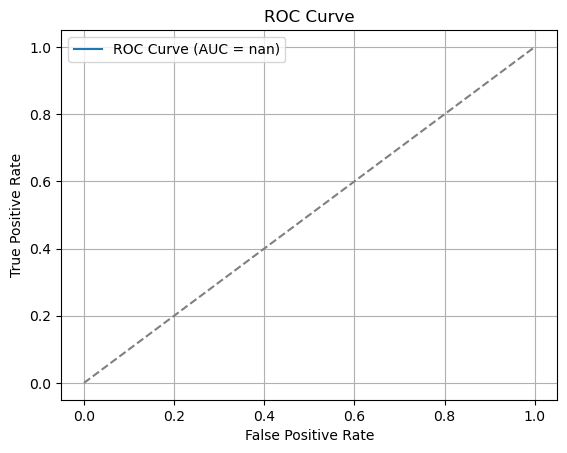

In [44]:
y_true = sa['label'].map({'normal':0,'fraud':1,'outlier':1,'anomaly':1}).values
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(sa_scaled)
y_pred_binary = (y_pred == -1).astype(int) 
cm = confusion_matrix(y_true, y_pred_binary)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_true, y_pred_binary))
auc = roc_auc_score(y_true, y_pred_binary)
print("AUC Score:", auc)
fpr, tpr, _ = roc_curve(y_true, y_pred_binary)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()